In [1]:
import numpy as np
import matplotlib.pyplot as plt

1-3

In [3]:
np.random.seed(0)
rewards = []

for n in range(1, 11):
    reward = np.random.rand()
    rewards.append(reward)
    Q = np.sum(rewards) / n 
    print(Q)

0.5488135039273248
0.6320014351498722
0.6222554154571295
0.6029123573420713
0.567060845741438
0.5801997236289743
0.5598265075766483
0.6013198192273272
0.6415801460355164
0.6157662833145425


In [4]:
Q = 0.0

for n in range(1, 11):
    reward = np.random.rand()
    Q += (reward - Q) / n 
    print(Q)

0.7917250380826646
0.6603099789177845
0.6295548396431672
0.7035652893055406
0.5770594430840099
0.49540441918693173
0.4275207017945595
0.4781580947637318
0.5114912787844116
0.5473433657306523


1-4

In [5]:
class Bandit:
    def __init__(self, arms=10):
        self.rates = np.random.rand(arms)
    
    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1 
        else:
            return 0 


In [10]:
bandit = Bandit()
for i in range(10):
    print(bandit.play(0))

0
0
0
1
0
0
0
0
1
0


In [12]:
bandit = Bandit()
Q = 0.0 

for n in range(1, 11):
    reward = bandit.play(0)
    Q += (reward - Q) / n 
    print(reward, Q)

1 1.0
1 1.0
1 1.0
0 0.75
1 0.8
1 0.8333333333333334
1 0.8571428571428572
1 0.875
1 0.8888888888888888
1 0.8999999999999999


In [15]:
bandit = Bandit()
Qs = np.zeros(10)
ns = np.zeros(10)

for n in range(10):
    action = np.random.randint(10)
    reward = bandit.play(action)

    ns[action] += 1 
    Qs[action] += (reward - Qs[action]) / ns[action]
    print(Qs, ns)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0.  0.  0.  0.  0.  0.5 0.  0.  0.  0. ] [0. 0. 0. 0. 0. 2. 0. 0. 0. 0.]
[0.         0.         0.         0.         0.         0.66666667
 0.         0.         0.         0.        ] [0. 0. 0. 0. 0. 3. 0. 0. 0. 0.]
[0.         0.         0.         0.         0.         0.66666667
 1.         0.         0.         0.        ] [0. 0. 0. 0. 0. 3. 1. 0. 0. 0.]
[0.         0.         0.         0.         0.         0.66666667
 1.         0.         0.         0.        ] [0. 0. 0. 0. 0. 3. 2. 0. 0. 0.]
[0.         0.         0.         1.         0.         0.66666667
 1.         0.         0.         0.        ] [0. 0. 0. 1. 0. 3. 2. 0. 0. 0.]
[0.   0.   0.   1.   0.   0.75 1.   0.   0.   0.  ] [0. 0. 0. 1. 0. 4. 2. 0. 0. 0.]
[0.   0.   0.   1.   0.   0.75 1.   0.   0.   0.  ] [0. 0. 1. 1. 0. 4. 2. 0. 0. 0.]
[0.   0.   0.   1.   0.   0.75 1.   0.   0.   0.  ] [0. 0. 1. 1. 0. 4. 2. 0. 0. 1.]
[0.   1.   0.   1.   0.   0.75

In [16]:
class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon
        self.action_size = action_size
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)
    
    def update(self, action, reward):
        self.ns[action] += 1 
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]
    
    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, self.action_size)
        return np.argmax(self.Qs)

714.0


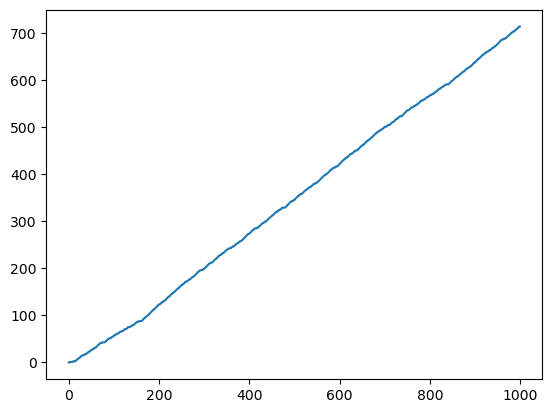

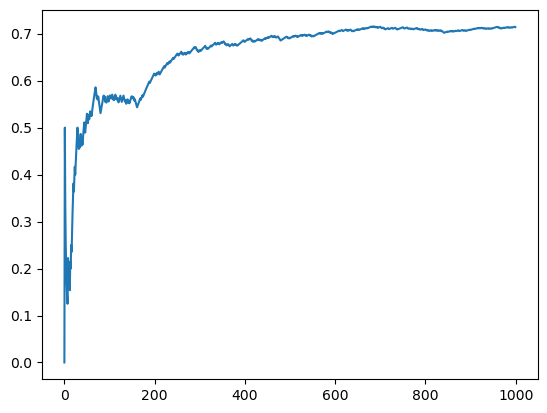

In [17]:
steps = 1000
epsilon = 0.1 

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0.0
total_rewards = []
rates = []

for step in range(steps):
    action = agent.get_action()
    reward = bandit.play(action)
    agent.update(action, reward)
    total_reward += reward

    total_rewards.append(total_reward)
    rates.append(total_reward / (step + 1))

print(total_reward)

plt.plot(total_rewards)
plt.show()

plt.plot(rates)
plt.show()

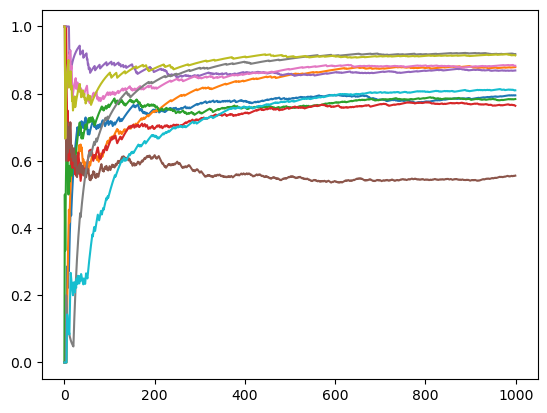

In [19]:
for i in range(10):
    steps = 1000
    epsilon = 0.1 

    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0.0
    total_rewards = []
    rates = []

    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)
        total_reward += reward

        total_rewards.append(total_reward)
        rates.append(total_reward / (step + 1))

    plt.plot(rates)
    
plt.show()

1-5

In [24]:
class NonStatBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.rates = np.random.rand(arms)
    
    def play(self, arm):
        rate = self.rates[arm]
        self.rates += 0.1 * np.random.randn(self.arms)
        if rate > np.random.rand():
            return 1 
        else:
            return 0 


In [25]:
class AlphaAgent:
    def __init__(self, epsilon, alpha, action_size=10):
        self.epsilon = epsilon
        self.action_size = action_size
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)
        self.alpha = alpha
    
    def update(self, action, reward):
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha
    
    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, self.action_size)
        return np.argmax(self.Qs)

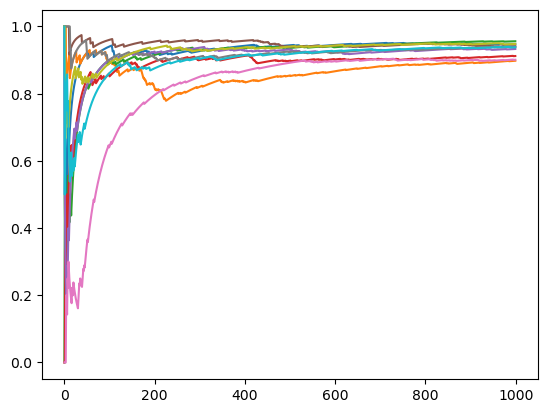

In [26]:
for i in range(10):
    steps = 1000
    epsilon = 0.1 
    alpha = 0.8

    bandit = NonStatBandit()
    agent = AlphaAgent(epsilon, alpha)
    total_reward = 0.0
    total_rewards = []
    rates = []

    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)
        total_reward += reward

        total_rewards.append(total_reward)
        rates.append(total_reward / (step + 1))

    plt.plot(rates)
    
plt.show()